# Project 3
Thomas Girmay \
For this project, we will be looking at a dataset containing crime in Baltimore in the years 2011 and 2012. 

# Data Wrangling
First, as alwways, let us import the dataset and clean it up.

In [43]:
# Includes and Standard Magic...
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd
# Load Stats
from scipy import stats
import folium

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

In [44]:
crimeDftoDrop = pd.read_csv("BPD_Arrests.csv")
crimeDf = pd.read_csv("BPD_Arrests.csv")
display(crimeDftoDrop.shape)
crimeDftoDrop.head()

(104528, 15)

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
0,11126858.0,23,B,M,01/01/2011,00:00:00,NaN,Unknown Offense,NaN,3 0233,Cds:P W/I Dist:Narc || Cds:Poss W/Intent Dist:...,NaN,NaN,NaN,NaN
1,11127013.0,37,B,M,01/01/2011,00:01:00,2000 Wilkens Ave,79-Other,Wilkens Av & S Payson St,1 1425,Reckless Endangerment || Hand Gun Violation,SOUTHERN,934.0,Carrollton Ridge,"(39.2814026274, -76.6483635135)"
2,11126887.0,46,B,M,01/01/2011,00:01:00,2800 Mayfield Ave,Unknown Offense,NaN,NaN,Unknown Charge,NORTHEASTERN,415.0,Belair-Edison,"(39.3227699160, -76.5735750473)"
3,11126873.0,50,B,M,01/01/2011,00:04:00,2100 Ashburton St,79-Other,2100 Ashburton St,1 1106,Reg Firearm:Illegal Possession || Hgv,WESTERN,735.0,Panway/Braddish Avenue,"(39.3117196723, -76.6623546313)"
4,11126968.0,33,B,M,01/01/2011,00:05:00,4000 Wilsby Ave,Unknown Offense,1700 Aliceanna St,NaN,Unknown Charge,NORTHERN,525.0,Pen Lucy,"(39.3382885254, -76.6045667070)"


\
\
We have about 100k entries in our data but there are many NaN values. These might pose a problem in the future so we need to figure out how to handle them. One method is to just drop any entry with a missing value. After cleaning it up, let's see how this affects the data. We will save a copy of the original dataframe so we can work with it if needeed.



In [45]:
crimeDftoDrop=crimeDftoDrop.dropna()

\
\
\
We have a few problems in the dataset: the coordinates are stored as a tuple in one column, the time records are not datetime objects, and we have a few unneeded columns. These are taken care of in the next three cells.

In [46]:
lat = []
long = []
for coord in crimeDftoDrop["Location 1"]:
    lat.append(float(str(coord).split(',')[0][1:]))
    long.append(float(str(coord).split(',')[1][:-1]))           
crimeDftoDrop["lat"] = lat
crimeDftoDrop["long"] = long


In [47]:
del crimeDftoDrop["Location 1"] 
del crimeDftoDrop["arrest"]
del crimeDftoDrop["post"]
del crimeDftoDrop["charge"]


In [48]:
crimeDftoDrop["arrestDatetime"]=pd.to_datetime(crimeDftoDrop["arrestDate"] + ' ' +  crimeDftoDrop["arrestTime"])
crimeDftoDrop.set_index("arrestDatetime", inplace = True)
display(crimeDftoDrop.dtypes)
display(crimeDftoDrop.shape)
crimeDftoDrop.head()


age                    int64
race                  object
sex                   object
arrestDate            object
arrestTime            object
arrestLocation        object
incidentOffense       object
incidentLocation      object
chargeDescription     object
district              object
neighborhood          object
lat                  float64
long                 float64
dtype: object

(54040, 13)

,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,chargeDescription,district,neighborhood,lat,long
arrestDatetime,,,,,,,,,,,,,
2011-01-01 00:01:00,37,B,M,01/01/2011,00:01:00,2000 Wilkens Ave,79-Other,Wilkens Av & S Payson St,Reckless Endangerment || Hand Gun Violation,SOUTHERN,Carrollton Ridge,39.281403,-76.648364
2011-01-01 00:04:00,50,B,M,01/01/2011,00:04:00,2100 Ashburton St,79-Other,2100 Ashburton St,Reg Firearm:Illegal Possession || Hgv,WESTERN,Panway/Braddish Avenue,39.311720,-76.662355
2011-01-01 00:05:00,41,B,M,01/01/2011,00:05:00,2900 Spellman Rd,81-Recovered Property,2900 Spelman Rd,Reckless Endangerment || Handgun Violation,SOUTHERN,Cherry Hill,39.244989,-76.627358
2011-01-01 00:05:00,29,B,M,01/01/2011,00:05:00,800 N Monroe St,79-Other,800 N Monroe St,Handgun On Person || Handgun Violation,WESTERN,Midtown-Edmondson,39.297982,-76.647511
2011-01-01 00:15:00,53,B,M,01/01/2011,00:15:00,3300 Woodland Ave,54-Armed Person,3300 Woodland Av,Reckless Endangerment || Hgv,NORTHWESTERN,Central Park Heights,39.343677,-76.672730


# #Questions 1&2
After getting rid of all of our rows with missing data, we are left with a dataframe half the size of our original. This data is missing completley at random; however, it could be due to some corruption or purposeful oversight. We can't be too sure and either way, dropping half of our data might hurt us down the line later so we should use another method of handling missing data instead of dropping. We can use the backfill method of imputation to fill the holes in our data instead of dropping the records.

In [49]:

crimeDf.fillna(method = "backfill",inplace = True)


\
\
Now let's clean this dataframe in the same way as the last.

In [50]:
lat = []
long = []
for coord in crimeDf["Location 1"]:
    lat.append(float(str(coord).split(',')[0][1:]))
    long.append(float(str(coord).split(',')[1][:-1]))           
crimeDf["lat"] = lat
crimeDf["long"] = long

In [51]:
del crimeDf["Location 1"] 
del crimeDf["arrest"]
del crimeDf["post"]
del crimeDf["charge"]
crimeDf.head()

,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,chargeDescription,district,neighborhood,lat,long
0,23,B,M,01/01/2011,00:00:00,2000 Wilkens Ave,Unknown Offense,Wilkens Av & S Payson St,Cds:P W/I Dist:Narc || Cds:Poss W/Intent Dist:...,SOUTHERN,Carrollton Ridge,39.281403,-76.648364
1,37,B,M,01/01/2011,00:01:00,2000 Wilkens Ave,79-Other,Wilkens Av & S Payson St,Reckless Endangerment || Hand Gun Violation,SOUTHERN,Carrollton Ridge,39.281403,-76.648364
2,46,B,M,01/01/2011,00:01:00,2800 Mayfield Ave,Unknown Offense,2100 Ashburton St,Unknown Charge,NORTHEASTERN,Belair-Edison,39.322770,-76.573575
3,50,B,M,01/01/2011,00:04:00,2100 Ashburton St,79-Other,2100 Ashburton St,Reg Firearm:Illegal Possession || Hgv,WESTERN,Panway/Braddish Avenue,39.311720,-76.662355
4,33,B,M,01/01/2011,00:05:00,4000 Wilsby Ave,Unknown Offense,1700 Aliceanna St,Unknown Charge,NORTHERN,Pen Lucy,39.338289,-76.604567


In [61]:
crimeDf["arrestDatetime"]=pd.to_datetime(crimeDf["arrestDate"] + ' ' +  crimeDf["arrestTime"])
crimeDf.set_index("arrestDatetime", inplace = True)
display(crimeDf.dtypes)
display(crimeDf.shape)
crimeDf.head()

age                     int64
race                   object
sex                    object
arrestDate             object
arrestTime             object
arrestLocation         object
incidentOffense        object
incidentLocation       object
chargeDescription      object
district               object
neighborhood           object
lat                   float64
long                  float64
ageRange             category
dtype: object

(104528, 14)

,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,chargeDescription,district,neighborhood,lat,long,ageRange
arrestDatetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,23,B,M,01/01/2011,00:00:00,2000 Wilkens Ave,Unknown Offense,Wilkens Av & S Payson St,Cds:P W/I Dist:Narc || Cds:Poss W/Intent Dist:...,SOUTHERN,Carrollton Ridge,39.281403,-76.648364,18-34
2011-01-01 00:01:00,37,B,M,01/01/2011,00:01:00,2000 Wilkens Ave,79-Other,Wilkens Av & S Payson St,Reckless Endangerment || Hand Gun Violation,SOUTHERN,Carrollton Ridge,39.281403,-76.648364,35-52
2011-01-01 00:01:00,46,B,M,01/01/2011,00:01:00,2800 Mayfield Ave,Unknown Offense,2100 Ashburton St,Unknown Charge,NORTHEASTERN,Belair-Edison,39.322770,-76.573575,35-52
2011-01-01 00:04:00,50,B,M,01/01/2011,00:04:00,2100 Ashburton St,79-Other,2100 Ashburton St,Reg Firearm:Illegal Possession || Hgv,WESTERN,Panway/Braddish Avenue,39.311720,-76.662355,35-52
2011-01-01 00:05:00,33,B,M,01/01/2011,00:05:00,4000 Wilsby Ave,Unknown Offense,1700 Aliceanna St,Unknown Charge,NORTHERN,Pen Lucy,39.338289,-76.604567,18-34


# Part 2: Analysis
\
\
Now that we have finished wrangling our data, we can begin to analyze it. First, lets look at how the distribution of races changes over the age ranges. To accomplish this, we must first cut our dataframe and then we can add this as a column in our dataframe to later make a pivot table with the cells containing the number of arrests made for each race.

In [53]:

ageRange = pd.cut(crimeDf["age"],5, labels = ["0-17", "18-34", "35-52", "53-69","69+"])

#crimeByAgeDf = pd.DataFrame(crimeByAge)
crimeDf["ageRange"] = ageRange

ageRacetable = pd.crosstab(crimeDf.ageRange,crimeDf.race)
ageRacetable

race,A,B,H,I,U,W
ageRange,,,,,,
0-17,2,442,0,0,6,13
18-34,160,52144,0,141,1209,8596
35-52,70,28415,1,63,478,5535
53-69,10,6153,0,13,54,867
69+,0,116,0,1,2,37


In [63]:
districtRacetable = pd.crosstab(crimeDf.district,crimeDf.race)
districtRacetable


race,A,B,H,I,U,W
district,,,,,,
CENTRAL,27,10849,0,19,178,1785
EASTERN,30,12432,0,22,162,1239
NORTHEASTERN,26,10795,0,20,197,1470
NORTHERN,12,4563,0,10,75,766
NORTHWESTERN,27,10834,0,14,124,1045
SOUTHEASTERN,42,6351,0,50,527,2559
SOUTHERN,33,8593,0,38,253,3331
SOUTHWESTERN,18,8501,0,18,105,1406
WESTERN,27,14352,1,27,128,1447


For the second analysis, I chose to use Race and District to make the next joint distribution table to see if different districts had a different distribution of arrests over race. As seen above, each district has the same distribution of arrests. So, in any district, most of the documented crimes are committed by blacks and hispanics make up the least ammount of crimes.

# Problem 2

Next, we can look at how the number of crimes changes from 2011 to 2012 in each neighbourhood and show the results in a bar graph.

(104528, 14)

4662

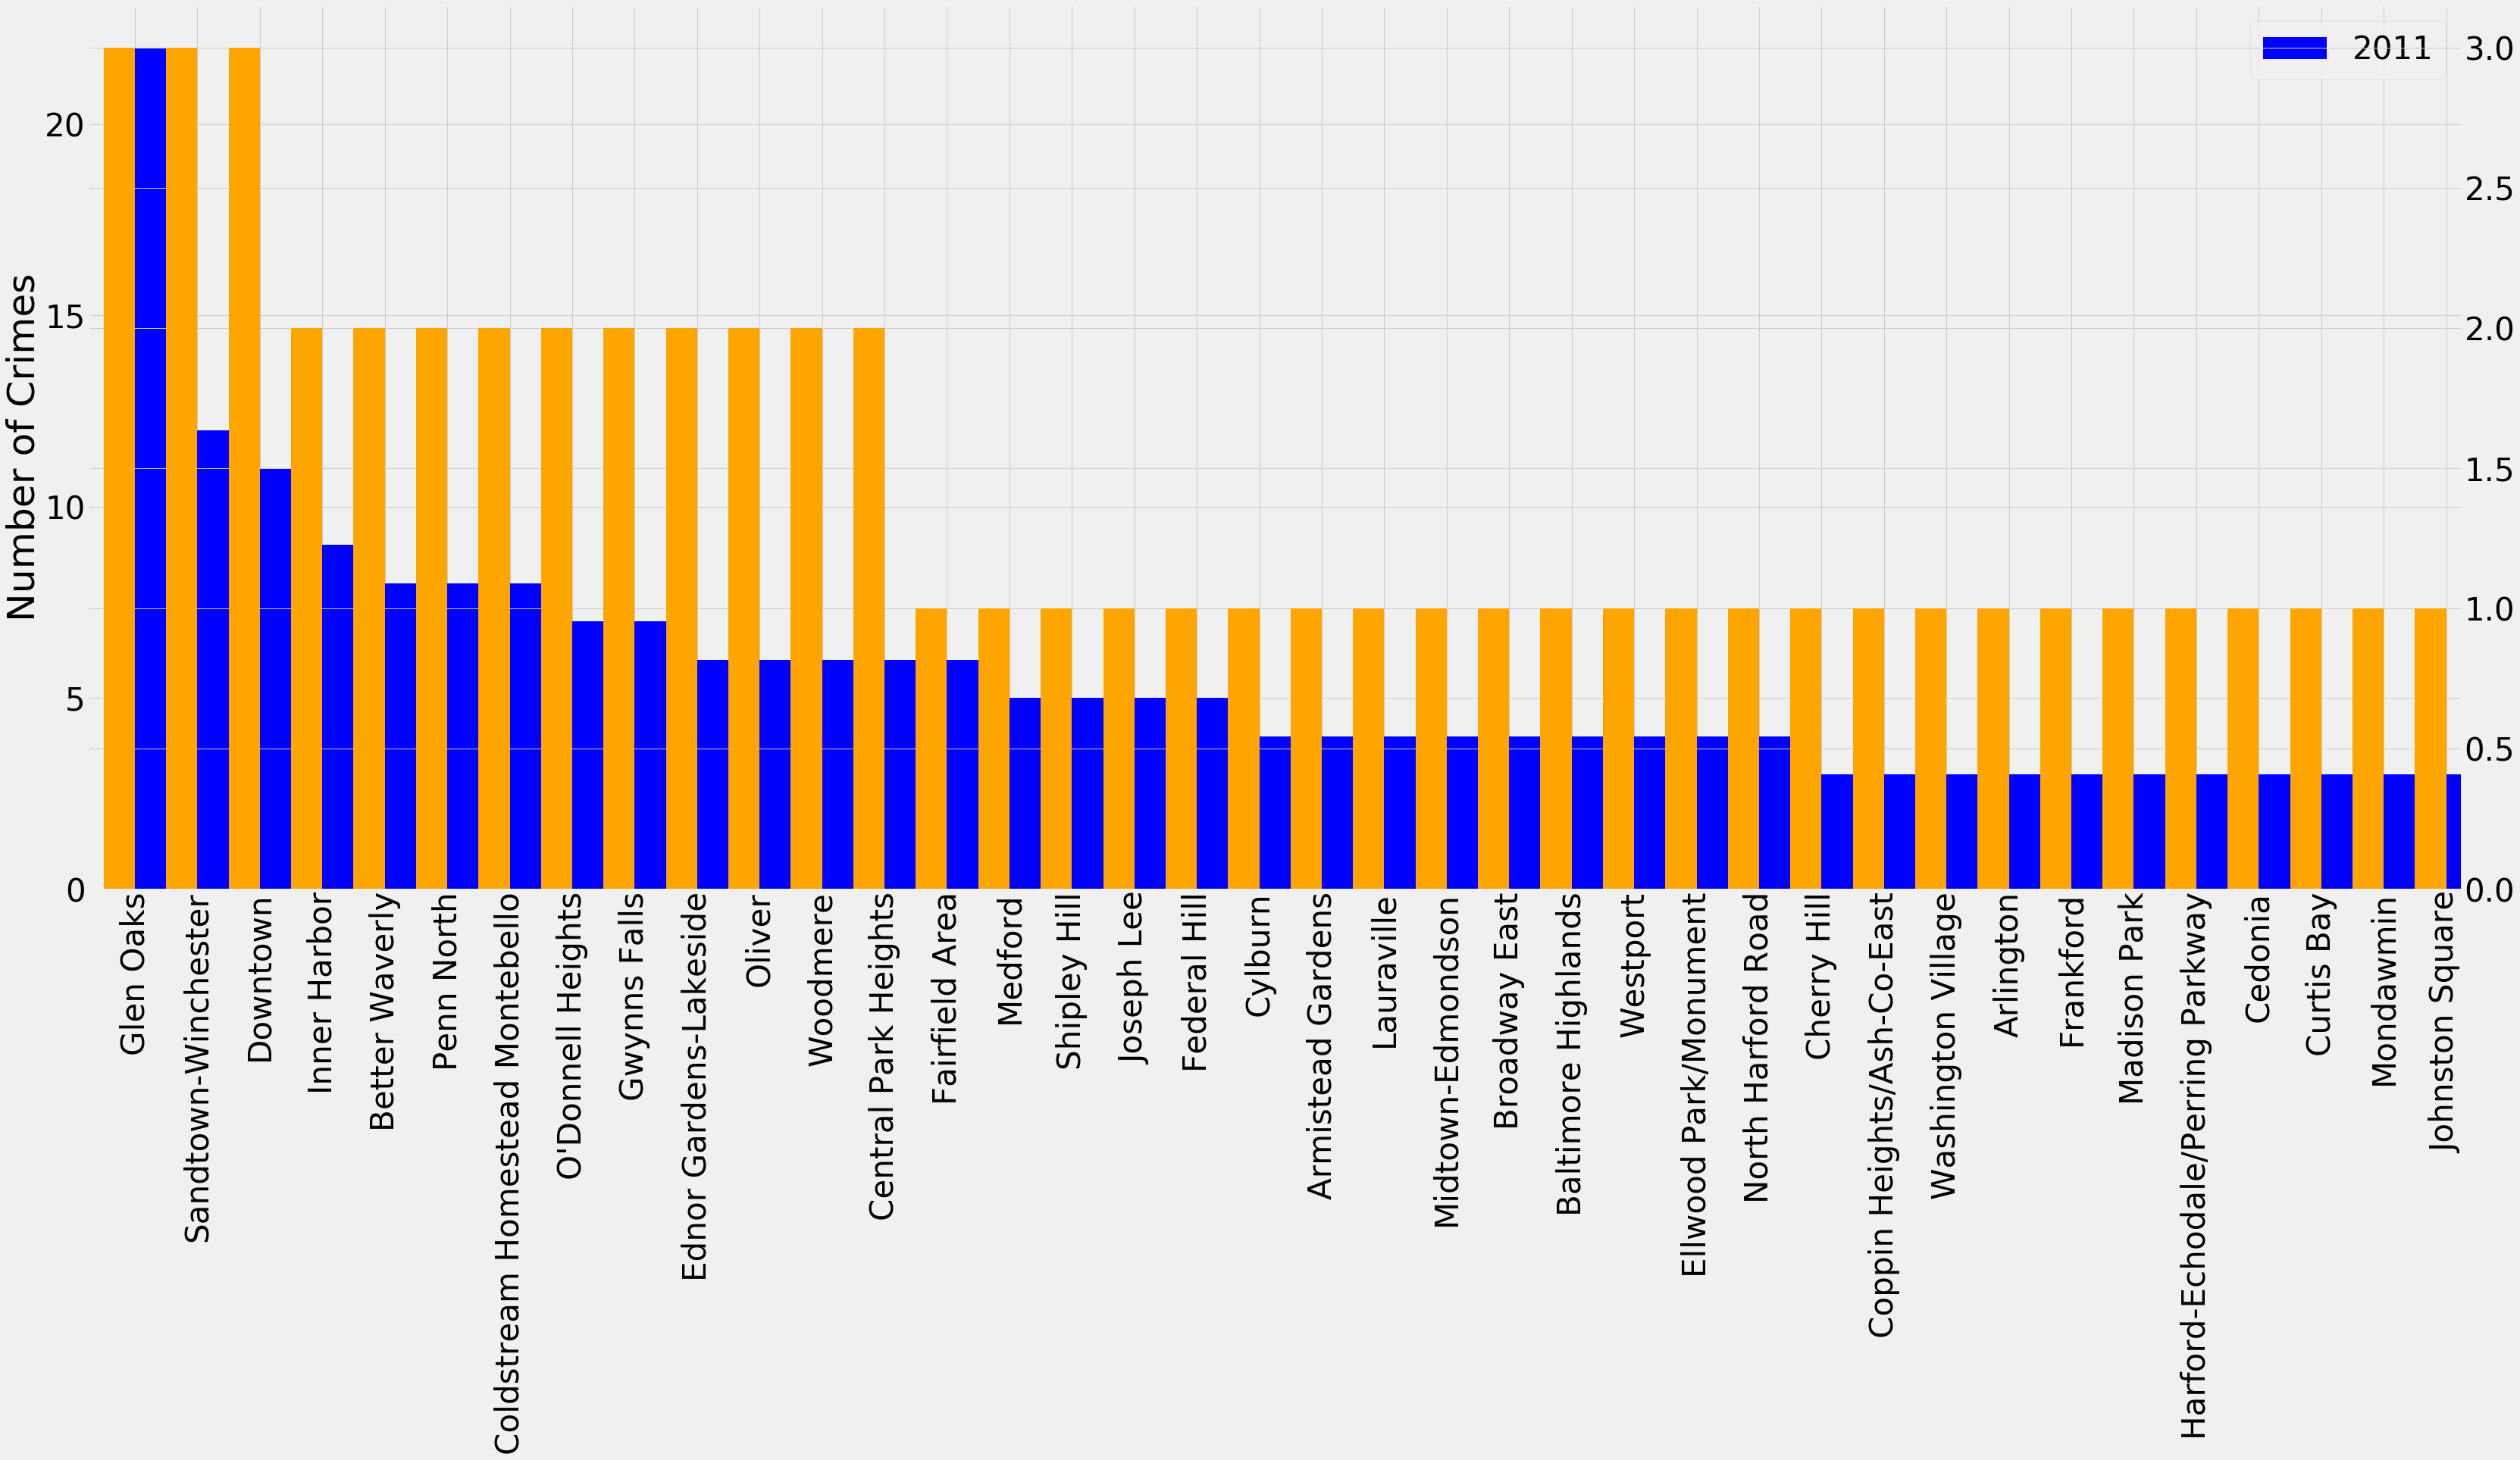

In [91]:
crimeDf2012 = crimeDf.between_time("2012", "2014",include_start = True)
crimeDf2011 =  crimeDf.between_time("2010","2011", include_end = True)


fig = plt.figure(figsize=(50,20))
plt.rcParams.update({'font.size': 42})
ax = fig.add_subplot(111)
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_ylabel('Number of Crimes')


width = 0.4
pd.value_counts(crimeDf2011["neighborhood"]).plot(kind = 'bar', ax=ax, color = 'blue', position = 0, label = '2011')
pd.value_counts(crimeDf2012["neighborhood"]).plot(kind = 'bar', ax=ax2,color = 'orange', position = 1,label = '2012')
leg = ax.legend()
plt.show()

\
We can see that crime increased in 2012 for almost all neighbourhoods.


In [110]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

# get the features (in dict format) and the labels
# (do not split into training and validation sets)


# specify the pipeline
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors=10)
pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])


In [112]:
pipeline.predict(["21","B","M"])

AttributeError: 'DictVectorizer' object has no attribute 'vocabulary_'

50    10.387246
46    10.397896
47    10.410232
44    10.415793
45    10.415795
49    10.422774
41    10.427497
43    10.428191
48    10.428574
42    10.430426
37    10.435348
35    10.435741
40    10.444182
39    10.445849
33    10.450212
36    10.451133
38    10.459748
31    10.474046
32    10.475979
34    10.481729
27    10.494819
25    10.505212
23    10.513694
29    10.521434
19    10.521791
26    10.521851
22    10.522789
12    10.529866
24    10.533473
30    10.536792
20    10.538679
28    10.548084
21    10.558205
18    10.589391
14    10.598301
13    10.604234
15    10.607327
17    10.615378
16    10.618001
10    10.618887
11    10.668624
9     10.741711
8     10.791882
7     11.010351
5     11.082840
4     11.087472
6     11.155269
3     11.340042
2     12.098010
1     13.796517
dtype: float64

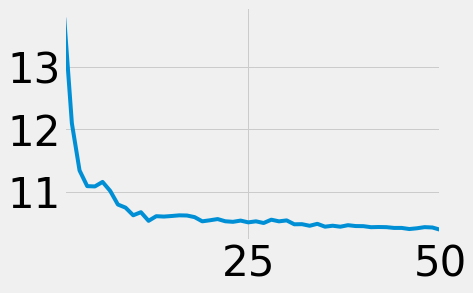

In [125]:
features = ["neighborhood", "race", "sex"]

train = crimeDf2011.sample(frac=.5)
val = crimeDf2011.drop(train.index)

X_dict = crimeDf2011[features].to_dict(orient="records")
y = crimeDf2011["age"]



vec = DictVectorizer(sparse=False)
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors=10)
pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])

# calculates estimate of test error based on 5-fold cross validation
def get_cv_error(k):
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    mse = np.mean(-cross_val_score(
        pipeline, X_dict, y, 
        cv=5, scoring="neg_mean_absolute_error"
    ))
    return mse
    
ks = pd.Series(range(1, 51))
ks.index = range(1, 51)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line()
test_errs.sort_values()
    



Given race, sex, and neighbourhood, I trained a Knn model to predict the age of the person arrested.


# Interactive Map

Another way we can showcase this data is with an interactive map using the Folium api.

In [93]:
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=11)
tooltip = 'Click Me For More Info!'
i=0
colourDict = {
    'M':'blue',
    'F':'pink'
}

for index, row in crimeDf2011.iterrows():
    folium.Marker([row.lat,row.long],
              popup=row.chargeDescription, 
              tooltip=tooltip,
              icon=folium.Icon(color=colourDict[row.sex])
             ).add_to(map_osm)
map_osm


Here, I have included a marker for all of the crimes committed in 2011 in Baltimore located on the coordinate recorded, made the colour of the marker tell the sex of the individual arrested, and had the marker be clickable so that one could see the charge description.
\
We can now see on a map the distribution of number of arrests in a district or neighborhood and sex. With this data we can see that most of the arrests made in 2011 were to males and that no district had a disproportionately large arrest of females.